epoch 0/5, step 0/938, loss =2.3235487937927246
epoch 0/5, step 100/938, loss =0.5001610517501831
epoch 0/5, step 200/938, loss =0.1591396927833557
epoch 0/5, step 300/938, loss =0.26889458298683167
epoch 0/5, step 400/938, loss =0.3457038998603821
epoch 0/5, step 500/938, loss =0.40593665838241577
epoch 0/5, step 600/938, loss =0.12679168581962585
epoch 0/5, step 700/938, loss =0.18890643119812012
epoch 0/5, step 800/938, loss =0.2073628455400467
epoch 0/5, step 900/938, loss =0.31217673420906067
epoch 1/5, step 0/938, loss =0.0795554369688034
epoch 1/5, step 100/938, loss =0.18895471096038818
epoch 1/5, step 200/938, loss =0.08136609941720963
epoch 1/5, step 300/938, loss =0.11198338121175766
epoch 1/5, step 400/938, loss =0.19793568551540375
epoch 1/5, step 500/938, loss =0.06693016737699509
epoch 1/5, step 600/938, loss =0.11354579031467438
epoch 1/5, step 700/938, loss =0.17335182428359985
epoch 1/5, step 800/938, loss =0.3113641142845154
epoch 1/5, step 900/938, loss =0.048294134

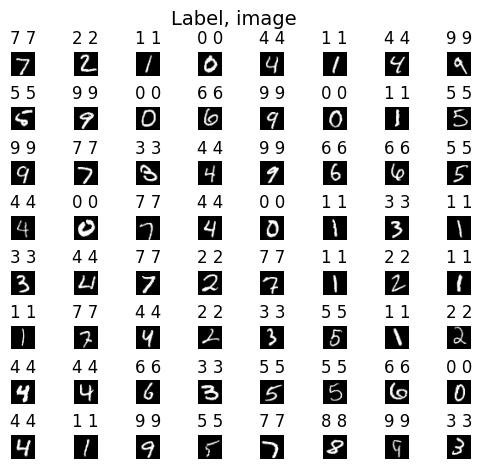

In [1]:
#  Importing necessary libraries and packages needed
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

# Download the dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, download=True)

# separate data and targets for both test and train
train_set = train_dataset.data
train_labels = train_dataset.targets
test_set = test_dataset.data
test_labels = test_dataset.targets

# transform the input data by normalizing to under a specific range
# using numpy 
def transform(x):
    data = x.numpy()
    data = (data - data.mean()) / data.std()
    return torch.tensor(data, dtype=torch.float32)

# calling transform function
train_set = transform(train_set)
test_set = transform(test_set)







# Make a class by inheriting from the base class nn.Module
# The first hidden layer has 784 input neurons and 80 output neurons
# The second hidden layer has 80 input neurons and 40 output neurons
# The third hidden layer has 40 input neurons and 10 output neurons
# we define forward function which used to predict the input data 
# We use relu as the activation function to learn complex patterns by introducing non-linearity from the data
# for the last layer we won't use any activation function becuase it can be done by our loss function
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.l1 = nn.Linear(784, 80)
        self.l2 = nn.Linear(80, 40)
        self.l3 = nn.Linear(40, 10)

    def forward(self, x):
        x.view(-1, 28, 28)
        output = torch.relu(self.l1(x))
        output = torch.relu(self.l2(output))
        output = self.l3(output)
        return output

# Convert train_set and test_set to TensorDataset
train_dataset = TensorDataset(train_set.view(-1, 28*28), train_labels)
test_dataset = TensorDataset(test_set.view(-1, 28*28), test_labels)

# Create DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# creating object by assigning class
model_fcnn = FCNN()

# learning rate defines the step size 
learning_rate = 0.001

# We use cross entropy loss which is a softmax function used for multi classification
criterion = nn.CrossEntropyLoss()

# We use the Adam optimizer, which is an adaptive learning rate optimization algorithm.
optimizer = torch.optim.Adam(model_fcnn.parameters(), lr=learning_rate)

# set the epoch to 5 to iterate over the train dataset
epochs = 5

# Iterate over each epoch in the training process
# Iterate over each batch in the training data

for epoch in range(epochs):
    for idx, (data, labels) in enumerate(train_loader):
        optimizer.zero_grad()  # Zero the gradients to prevent accumulation from previous iterations
        y_hat = model_fcnn(data) # Forward pass: compute predictions using the model
        loss = criterion(y_hat, labels)  # Compute the loss between the predictions and the labels
        loss.backward() # Backward pass: compute gradients of the loss with respect to model parameters
        optimizer.step() # Update model parameters using the gradients
        
        if idx % 100 == 0:
            print(f'epoch {epoch}/{epochs}, step {idx}/{len(train_loader)}, loss ={loss.item()}')

model_fcnn.eval()
flag = True
with torch.no_grad():
    correct =0
    samples=0
    for idx,(data, labels) in enumerate(test_loader):
        output = model_fcnn(data)
        _,result = torch.max(output,1)
        samples += labels.shape[0]
        correct+=(result==labels).sum().item()
        if flag:  # to plot first batch along with predicted labels and ground-with labels
            fig, axes = plt.subplots(8,8, figsize=(5,5))
            fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])  
            for i,ax in enumerate(axes.flat):
                image = data[i].reshape((28,28))
                ax.imshow(image, cmap='gray')
                if result[i]!=labels[i]:
                    ax.set_title(f'{result[i]} {labels[i]}', c='red')
                else:
                    ax.set_title(f'{result[i]} {labels[i]}')
                ax.set_axis_off()
                fig.suptitle("Label, image", fontsize=14)
                flag= False

print(f'Accuracy of the network on the 10000 test images: {100 * correct / samples}%')


In [ ]:
import torchvision
from torch import optim
# Define the CNN model class
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Define the convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Define the pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Define the fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 80)
        self.fc2 = nn.Linear(80, 10)

    # Define the forward pass
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the transformations for data preprocessing
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Load the testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


model_cnn = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_cnn.parameters(), lr=0.001, momentum=0.9)

# Train the model
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_cnn(inputs)
        # print(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f"Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}")
            running_loss = 0.0


model_cnn.eval()
flag = True
with torch.no_grad():
    correct =0
    samples=0
    for idx,(data, labels) in enumerate(testloader):
        
        output = model_cnn(data)
        _,result = torch.max(output,1)
        samples+=labels.shape[0]
        correct+=(result==labels).sum().item()
    print(f'The accuracy for the test set is {100*correct/samples}')


Epoch 1, Batch 100, Loss: 2.252
Epoch 1, Batch 200, Loss: 1.971
Epoch 1, Batch 300, Loss: 1.123
Epoch 1, Batch 400, Loss: 0.617
Epoch 1, Batch 500, Loss: 0.452
Epoch 1, Batch 600, Loss: 0.389
Epoch 1, Batch 700, Loss: 0.345
Epoch 1, Batch 800, Loss: 0.327
Epoch 1, Batch 900, Loss: 0.286
Epoch 2, Batch 100, Loss: 0.269
Epoch 2, Batch 200, Loss: 0.263
Epoch 2, Batch 300, Loss: 0.216
Epoch 2, Batch 400, Loss: 0.238
Epoch 2, Batch 500, Loss: 0.221
Epoch 2, Batch 600, Loss: 0.186
Epoch 2, Batch 700, Loss: 0.172
Epoch 2, Batch 800, Loss: 0.176
Epoch 2, Batch 900, Loss: 0.163
Epoch 3, Batch 100, Loss: 0.154
Epoch 3, Batch 200, Loss: 0.138
Epoch 3, Batch 300, Loss: 0.153
Epoch 3, Batch 400, Loss: 0.131
Epoch 3, Batch 500, Loss: 0.126
Epoch 3, Batch 600, Loss: 0.138
Epoch 3, Batch 700, Loss: 0.116
Epoch 3, Batch 800, Loss: 0.116
Epoch 3, Batch 900, Loss: 0.113
Epoch 4, Batch 100, Loss: 0.097
Epoch 4, Batch 200, Loss: 0.098
Epoch 4, Batch 300, Loss: 0.115
Epoch 4, Batch 400, Loss: 0.100
Epoch 4,

## Testing the user input with CNN model

In [ ]:
def predict_and_plot(image_path, model):
    image = Image.open(image_path).convert('L')
    transform = transforms.Compose([
        transforms.Resize((28, 28)),  
        transforms.ToTensor(),       
        transforms.Normalize((0.1307,), (0.3081,))  
    ])
    image_tensor = transform(image)  
    image_tensor = image_tensor.unsqueeze(0)    
    print(image_tensor.shape)
    with torch.no_grad():
        output = model(image_tensor)
        predicted_label = torch.argmax(output).item()
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
predict_and_plot('input_image2.jpg', model=model_cnn)

## Testing the user input with FCNN model

In [ ]:
def predict_and_plot(image_path, model):
    image = Image.open(image_path).convert('L')
    image_resized = image.resize((28, 28), Image.BICUBIC)  
    image_array = np.array(image_resized).reshape(-1, 784)
    transform = transforms.Compose([
        transforms.ToTensor(),        
        transforms.Normalize((0.1307,), (0.3081,)) 
    ])
    image_tensor = torch.tensor(image_array, dtype=torch.float)
    print(image_tensor.shape) 
    with torch.no_grad():
        output = model(image_tensor)
        predicted_label = torch.argmax(output).item()
    plt.imshow(image_resized, cmap='gray')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()
predict_and_plot('mnist_0.jpeg', model=model_fcnn)

